In [6]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pymongo import MongoClient


In [7]:
cluster = MongoClient("mongodb://analyticslab-cosmosdb-dev:b9LZFoiyld9Bw1wxHzqKlx783zzvuex2xzePh7pS3y21UHVFbn7C15bsyqfCthE139hraUyTTSPYce0JrxNSVA%3D%3D@analyticslab-cosmosdb-dev.mongo.cosmos.azure.com:10255/?ssl=true&replicaSet=globaldb&retrywrites=false&maxIdleTimeMS=120000&appName=@analyticslab-cosmosdb-dev@")

First we take drivers from cc-all-data

In [8]:
db = cluster["cpfo-data"]
collection = db["cc-all-data"]

In [9]:
results= collection.find({"datapoint_name": "Ethanol US"})
results_list=list(results)
df1=pd.DataFrame(results_list)
df1=df1[['date', 'value']]
df1=df1.rename(columns={'value': 'Ethanol US'})

In [10]:
results= collection.find({"datapoint_name": "USD/INR exchange rate"})
results_list=list(results)
df2=pd.DataFrame(results_list)
df2=df2[['date', 'value']]
df2=df2.rename(columns={'value': 'USD/INR exchange rate'})

In [11]:
results= collection.find({"datapoint_name": "Ethanol Europe"})
results_list=list(results)
df3=pd.DataFrame(results_list)
df3=df3[['date', 'value']]
df3=df3.rename(columns={'value': 'Ethanol Europe'})

In [12]:
results= collection.find({"datapoint_name": "Federal funds rate"})
results_list=list(results)
df4=pd.DataFrame(results_list)
df4=df4[['date', 'value']]
df4=df4.rename(columns={'value': 'Federal funds rate'})

In [13]:
results= collection.find({"datapoint_name": "Ethanol Futures CLOSE"})
results_list=list(results)
df5=pd.DataFrame(results_list)
df5=df5[['date', 'value']]
df5=df5.rename(columns={'value': 'Ethanol Futures CLOSE'})

In [14]:
results= collection.find({"datapoint_name": "CBOE Volatility Index (VIX) CLOSE"})
results_list=list(results)
df6=pd.DataFrame(results_list)
df6=df6[['date', 'value']]
df6=df6.rename(columns={'value': 'CBOE Volatility Index (VIX) CLOSE'})

In [15]:
results= collection.find({"datapoint_name": "India Inflation data Core CPI"})
results_list=list(results)
df7=pd.DataFrame(results_list)
df7=df7[['date', 'value']]
df7=df7.rename(columns={'value': 'India Inflation data Core CPI'})

In [16]:
results= collection.find({"datapoint_name": "USD / Brazilian Real Rate"})
results_list=list(results)
df8=pd.DataFrame(results_list)
df8=df8[['date', 'value']]
df8=df8.rename(columns={'value': 'USD / Brazilian Real Rate'})

In [17]:
results= collection.find({"datapoint_name": "ICEUS Sugar #11 CLOSE"})
results_list=list(results)
df9=pd.DataFrame(results_list)
df9=df9[['date', 'value']]
df9=df9.rename(columns={'value': 'ICEUS Sugar #11 CLOSE'})

In [18]:
cc=pd.merge(df1, df2,on='date')
cc=pd.merge(cc, df3, on='date')
cc=pd.merge(cc, df4, on='date')
cc=pd.merge(cc, df6,on='date')
cc=pd.merge(cc, df7, on='date')
cc=pd.merge(cc, df8, on='date')
cc=pd.merge(cc, df9, on='date')

In [19]:
cc

,date,Ethanol US,USD/INR exchange rate,Ethanol Europe,Federal funds rate,CBOE Volatility Index (VIX) CLOSE,India Inflation data Core CPI,USD / Brazilian Real Rate,ICEUS Sugar #11 CLOSE
0,2023-03-21,0.60,82.68,0.84,4.58,21.38,6.44,5.24,20.48
1,2023-03-24,0.62,82.35,0.84,4.83,21.74,6.44,5.25,20.89
2,2023-03-27,0.62,82.35,0.83,4.83,20.60,6.44,5.20,20.89
3,2023-03-28,0.62,82.16,0.83,4.83,19.97,6.44,5.17,20.89
4,2023-03-29,0.61,82.24,0.84,4.83,19.12,6.44,5.14,21.25
...,...,...,...,...,...,...,...,...,...
322,2024-06-08,0.52,83.52,0.72,5.33,12.22,4.83,5.34,19.00
323,2024-06-09,0.52,83.52,0.72,5.33,12.22,4.83,5.34,19.00
324,2024-06-10,0.51,83.52,0.73,5.33,12.74,4.83,5.35,18.63
325,2024-06-11,0.52,83.60,0.73,5.33,12.85,4.83,5.37,18.79


In [20]:
correlation_matrix = cc.corr()

<Axes: >

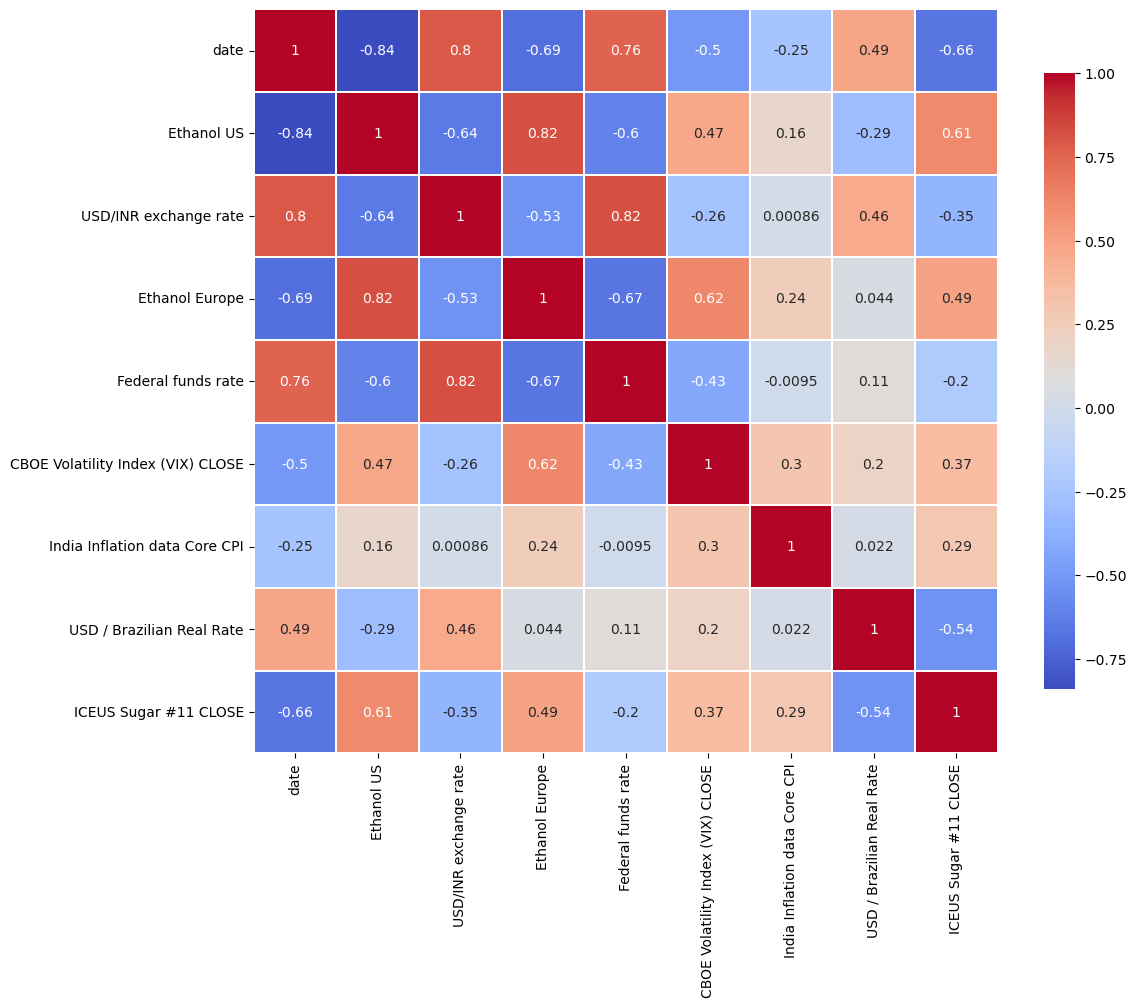

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [22]:
sq_corr1=correlation_matrix.iloc[-1]**2
average_corr1=sq_corr1.mean()
average_corr1

0.3021945252638215

In [23]:
#SUGAR ICE IRRELEVANT DRIVERS
#Ethanol Brazil
#US Dollar Index CLOSE (or HIGH OPEN LOW)
#Brent crude oil CLOSE (or HIGH OPEN LOW) ~ ~ only about 0.1 correlation
#WTI crude oil CLOSE (or HIGH OPEN LOW) ~ only about 0.1 correlation
#Hydrous Ethanol Futures CLOSE

In [24]:
#SUGAR ICE RELEVANT DRIVERS
#Ethanol US (+ve)
#USD/INR exchange rate (-ve)
#Ethanol Europe (+ve)
#Ethanol Futures CLOSE (+ve)
#CBOE Volatility Index (VIX) CLOSE (+ve)
#India Inflation data Core CPI
#USD / Brazilian Real Rate (-ve)

In [25]:
cc.set_index('date', inplace=True)

In [26]:
scaler=StandardScaler()
cc[cc.columns[1:]]=scaler.fit_transform(cc[cc.columns[1:]])

Text(0, 0.5, 'Values')

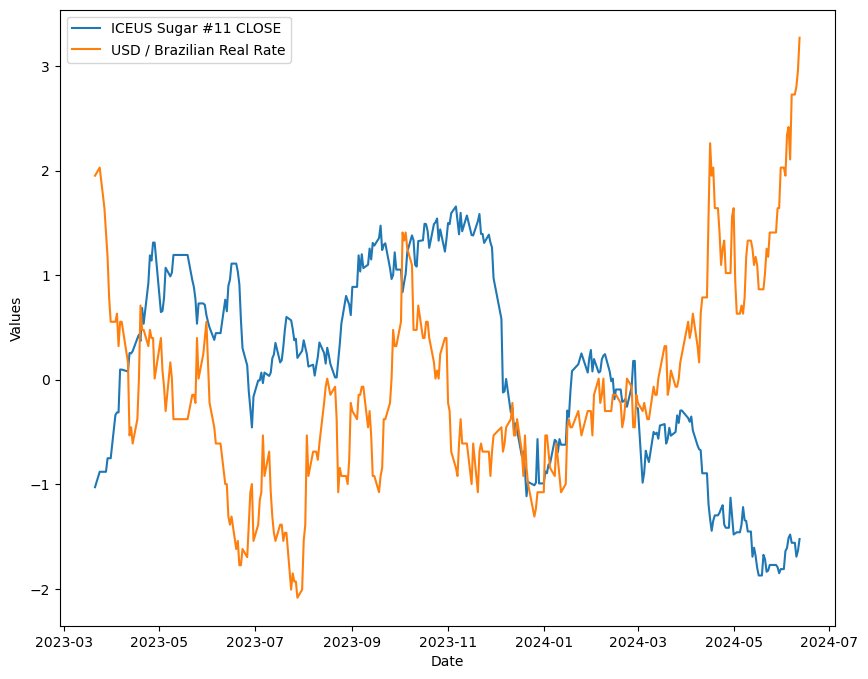

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(cc.index, cc['ICEUS Sugar #11 CLOSE'], label='ICEUS Sugar #11 CLOSE')
# #plt.plot(cc.index, cc['Ethanol US'], label='Ethanol US')
# #plt.plot(cc.index, cc['USD/INR exchange rate'], label='USD/INR exchange rate')
# #plt.plot(cc.index, cc['Ethanol Europe'], label='Ethanol Europe')
# #plt.plot(cc.index, cc['Ethanol Futures CLOSE'], label='Ethanol Futures CLOSE')
# #plt.plot(cc.index, cc['CBOE Volatility Index (VIX) CLOSE'], label='CBOE Volatility Index (VIX) CLOSE')
plt.plot(cc.index, cc['USD / Brazilian Real Rate'], label='USD / Brazilian Real Rate')
# plt.plot(cc.index, cc['India Inflation data Core CPI'], label='India Inflation data Core CPI')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Values')

Now we take drivers from ceicdata-all-commodities

In [28]:
collection2=db['ceicdata-all-commodities']

In [29]:
results= collection2.find({"datapoint_id": "449467297"})
results_list=list(results)
df1=pd.DataFrame(results_list)
name=df1['datapoint_name'][0]
df1=df1[['date', 'value']]
df1=df1.rename(columns={'value': name})

In [30]:
results= collection2.find({"datapoint_id": "408949517"})
results_list=list(results)
df2=pd.DataFrame(results_list)
name=df2['datapoint_name'][0]
df2=df2[['date', 'value']]
df2=df2.rename(columns={'value': name})

In [31]:
results= collection2.find({"datapoint_id": "455409917"})
results_list=list(results)
df3=pd.DataFrame(results_list)
name=df3['datapoint_name'][0]
df3=df3[['date', 'value']]
df3=df3.rename(columns={'value': name})

In [32]:
results= collection2.find({"datapoint_id": "194091602"})
results_list=list(results)
df4=pd.DataFrame(results_list)
name=df4['datapoint_name'][0]
df4=df4[['date', 'value']]
df4=df4.rename(columns={'value': name})

In [33]:
results= collection2.find({"datapoint_id": "81382801"})
results_list=list(results)
df5=pd.DataFrame(results_list)
name=df5['datapoint_name'][0]
df5=df5[['date', 'value']]
df5=df5.rename(columns={'value': name})

In [34]:
results= collection2.find({"datapoint_id": "40782001"})
results_list=list(results)
df6=pd.DataFrame(results_list)
name=df6['datapoint_name'][0]
df6=df6[['date', 'value']]
df6=df6.rename(columns={'value': name})

In [35]:
results= collection2.find({"datapoint_id": "365307217"})
results_list=list(results)
df6=pd.DataFrame(results_list)
name=df6['datapoint_name'][0]
df6=df6[['date', 'value']]
df6=df6.rename(columns={'value': name})

In [36]:
results= collection2.find({"datapoint_id": "480877897"})
results_list=list(results)
df7=pd.DataFrame(results_list)
name=df7['datapoint_name'][0]
df7=df7[['date', 'value']]
df7=df7.rename(columns={'value': name})

In [37]:
results= collection2.find({"datapoint_id": "97684401"})
results_list=list(results)
df8=pd.DataFrame(results_list)
name=df8['datapoint_name'][0]
df8=df8[['date', 'value']]
df8=df8.rename(columns={'value': name})

In [38]:
results= collection2.find({"datapoint_id": "449471917"})
results_list=list(results)
df9=pd.DataFrame(results_list)
name=df9['datapoint_name'][0]
df9=df9[['date', 'value']]
df9=df9.rename(columns={'value': name})

In [39]:
results= collection2.find({"datapoint_id": "94664701"})
results_list=list(results)
df10=pd.DataFrame(results_list)
name=df10['datapoint_name'][0]
df10=df10[['date', 'value']]
df10=df10.rename(columns={'value': name})

In [40]:
results= collection.find({"datapoint_name": "ICEUS Sugar #11 CLOSE"})
results_list=list(results)
df11=pd.DataFrame(results_list)
df11=df11[['date', 'value']]
df11=df11.rename(columns={'value': 'ICEUS Sugar #11 CLOSE'})

In [41]:
df11

,date,ICEUS Sugar #11 CLOSE
0,2017-03-22,17.30
1,2017-08-03,14.31
2,2018-01-05,15.08
3,2018-05-30,12.60
4,2018-10-22,13.82
...,...,...
2079,2024-06-29,20.31
2080,2024-06-30,20.31
2081,2024-07-01,20.23
2082,2024-07-02,20.61


In [42]:
ceic=pd.merge(df1, df2, on='date', how='outer')
ceic=pd.merge(ceic, df3, on='date', how='outer')
ceic=pd.merge(ceic, df4, on='date', how='outer')
ceic=pd.merge(ceic, df6, on='date', how='outer')
ceic=pd.merge(ceic, df7, on='date', how='outer')
ceic=pd.merge(ceic, df8, on='date', how='outer')
ceic=pd.merge(ceic, df9, on='date', how='outer')
ceic=pd.merge(ceic, df10, on='date', how='outer')
ceic=pd.merge(ceic, df11, on='date', how='outer')

In [43]:
ceic['date']=pd.to_datetime(ceic['date'])

In [44]:
ceic=ceic.sort_values(by='date')

In [45]:
ceic.set_index('date', inplace=True)

In [46]:
date_range=pd.date_range('2017-03-22', '2024-07-03')
idx=pd.DatetimeIndex(date_range)
ceic=ceic.reindex(idx)

In [47]:
ceic

,Exports: Price: Transformation Industry: Sugars and Molasses,Refined Sugar Prices: Next 3 Months,Agricultural Prices: Average Weekly Prices: Producer: Sugar Cane: Ton: São Paulo,Avg Consumer Price: Granulated Sugar,CPI: 2012=100: FB: Sugar and Confectionery,Exports: Mfg: Agro: Food: Sugar,Imports: Sugar & Sugar Confectionary (Sugar),Imports: Price: Transformation Industry: Sugars and Molasses,Sugar: China: Zhengzhou Commodity Exchange: Settlement Price: 1st Month,ICEUS Sugar #11 CLOSE
2017-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6633.0,17.30
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6661.0,17.60
2017-03-24,NaN,NaN,83.79,NaN,NaN,NaN,NaN,NaN,6669.0,17.71
2017-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.31
2024-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.31
2024-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6279.0,20.23
2024-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6326.0,20.61


In [48]:
#ceic_drop=ceic.dropna(thresh=2)
#correlation_matrix0=ceic.corr()

In [49]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix0, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [50]:
# sq_corr0=correlation_matrix0.iloc[-1]**2
# average_corr0=sq_corr0.mean()
# average_corr0

In [51]:
#DF1
#DF2
#DF3
#DF4
#df5 ~ only 0.32
#DF6
#df7 ~ only 0.33
#DF8
#df9 ~ about 0.54
#DF10

If we forward fill: 

In [52]:
ceic_forward_filled=ceic.ffill()
ceic_forward_filled.dropna()
correlation_matrix2=ceic_forward_filled.corr()

<Axes: >

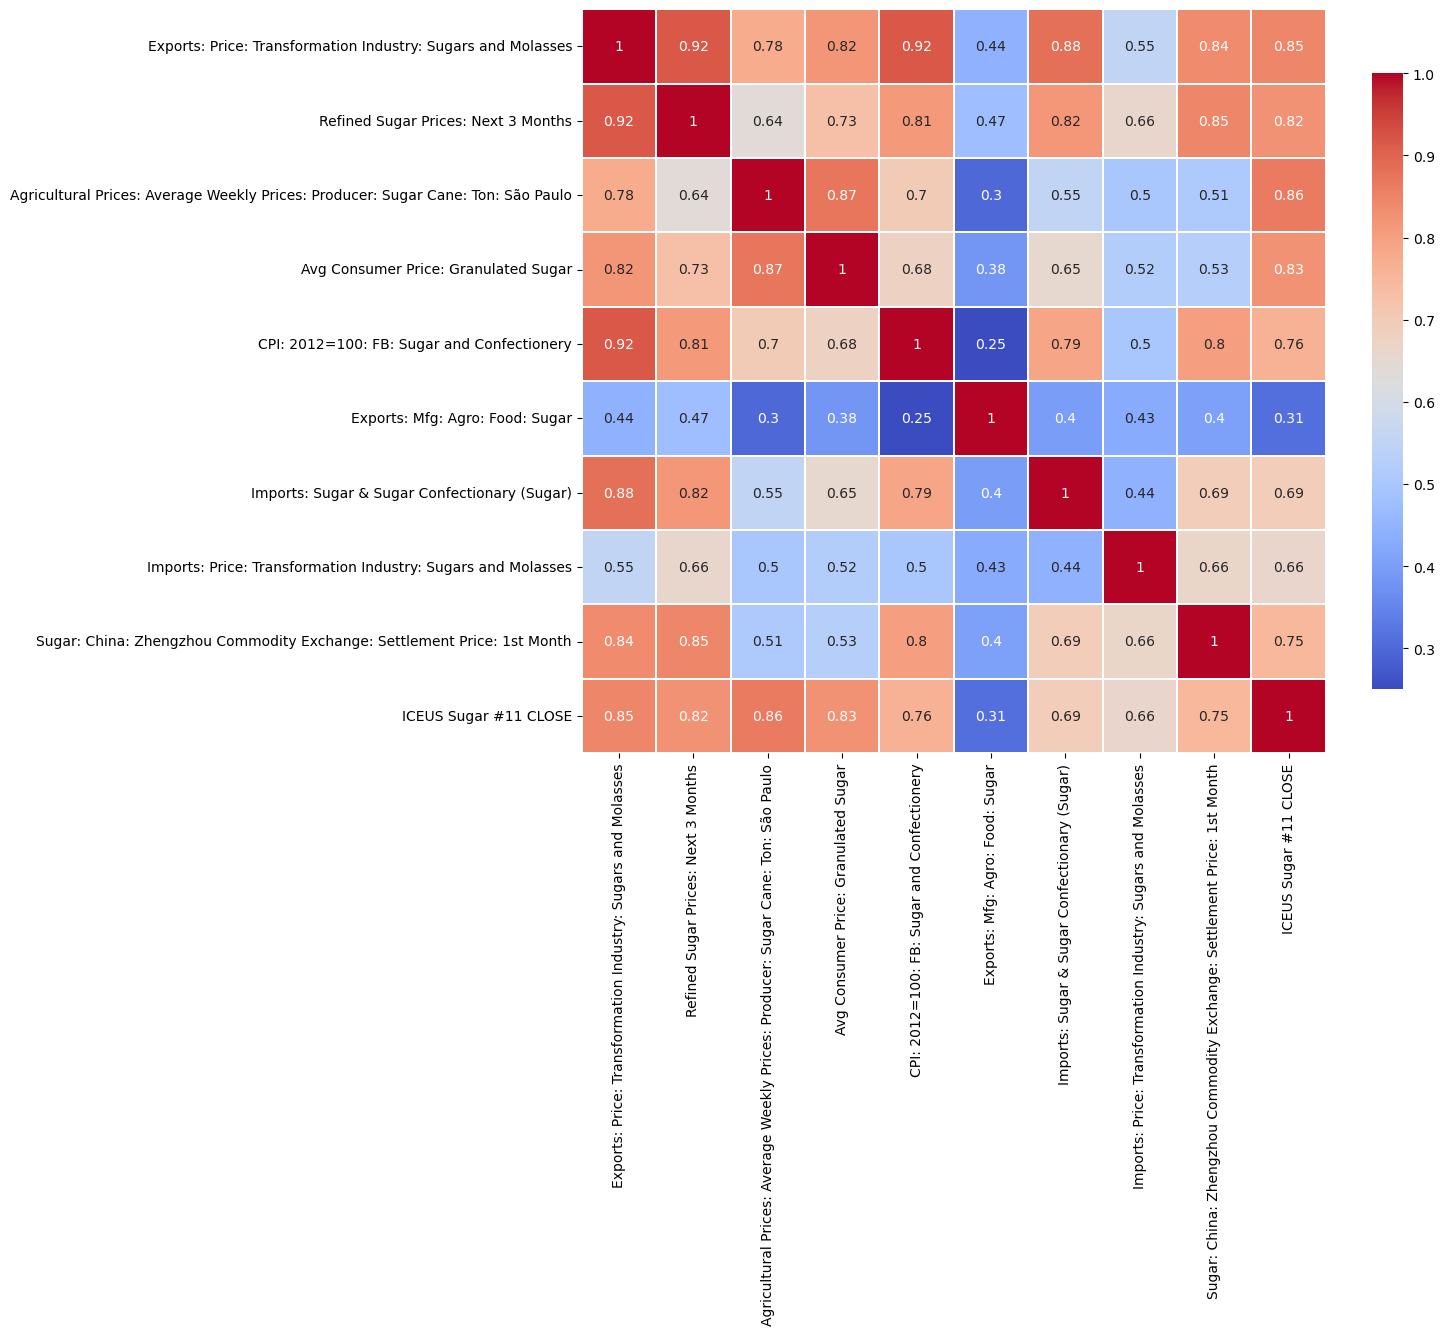

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [54]:
sq_corr2=correlation_matrix2.iloc[-1]**2
average_corr2=sq_corr2.mean()
average_corr2

0.5981672036075505

If we backward fill:

In [75]:
ceic_backward_filled=ceic.bfill()
ceic_backward_filled=ceic_backward_filled.dropna()
correlation_matrix3=ceic_backward_filled.corr()

In [76]:
ceic_backward_filled

,Exports: Price: Transformation Industry: Sugars and Molasses,Refined Sugar Prices: Next 3 Months,Agricultural Prices: Average Weekly Prices: Producer: Sugar Cane: Ton: São Paulo,Avg Consumer Price: Granulated Sugar,CPI: 2012=100: FB: Sugar and Confectionery,Exports: Mfg: Agro: Food: Sugar,Imports: Sugar & Sugar Confectionary (Sugar),Imports: Price: Transformation Industry: Sugars and Molasses,Sugar: China: Zhengzhou Commodity Exchange: Settlement Price: 1st Month,ICEUS Sugar #11 CLOSE
2017-03-22,295.977494,475.61,83.79,43.64,118.5,319.20,63.646,993.017032,6633.0,17.30
2017-03-23,295.977494,475.61,83.79,43.64,118.5,319.20,63.646,993.017032,6661.0,17.60
2017-03-24,295.977494,475.61,83.79,43.64,118.5,319.20,63.646,993.017032,6669.0,17.71
2017-03-25,295.977494,475.61,84.21,43.64,118.5,319.20,63.646,993.017032,6628.0,17.70
2017-03-26,295.977494,475.61,84.21,43.64,118.5,319.20,63.646,993.017032,6628.0,17.70
...,...,...,...,...,...,...,...,...,...,...
2024-03-28,543.485887,636.63,147.66,73.80,128.5,350.04,171.646,1446.233823,6460.0,22.52
2024-03-29,543.485887,636.63,147.66,73.80,128.5,350.04,171.646,1446.233823,6504.0,22.52
2024-03-30,543.485887,636.63,147.66,73.80,128.5,350.04,171.646,1446.233823,6627.0,22.52
2024-03-31,543.485887,636.63,147.66,73.80,128.5,350.04,171.646,1446.233823,6627.0,22.52


<Axes: >

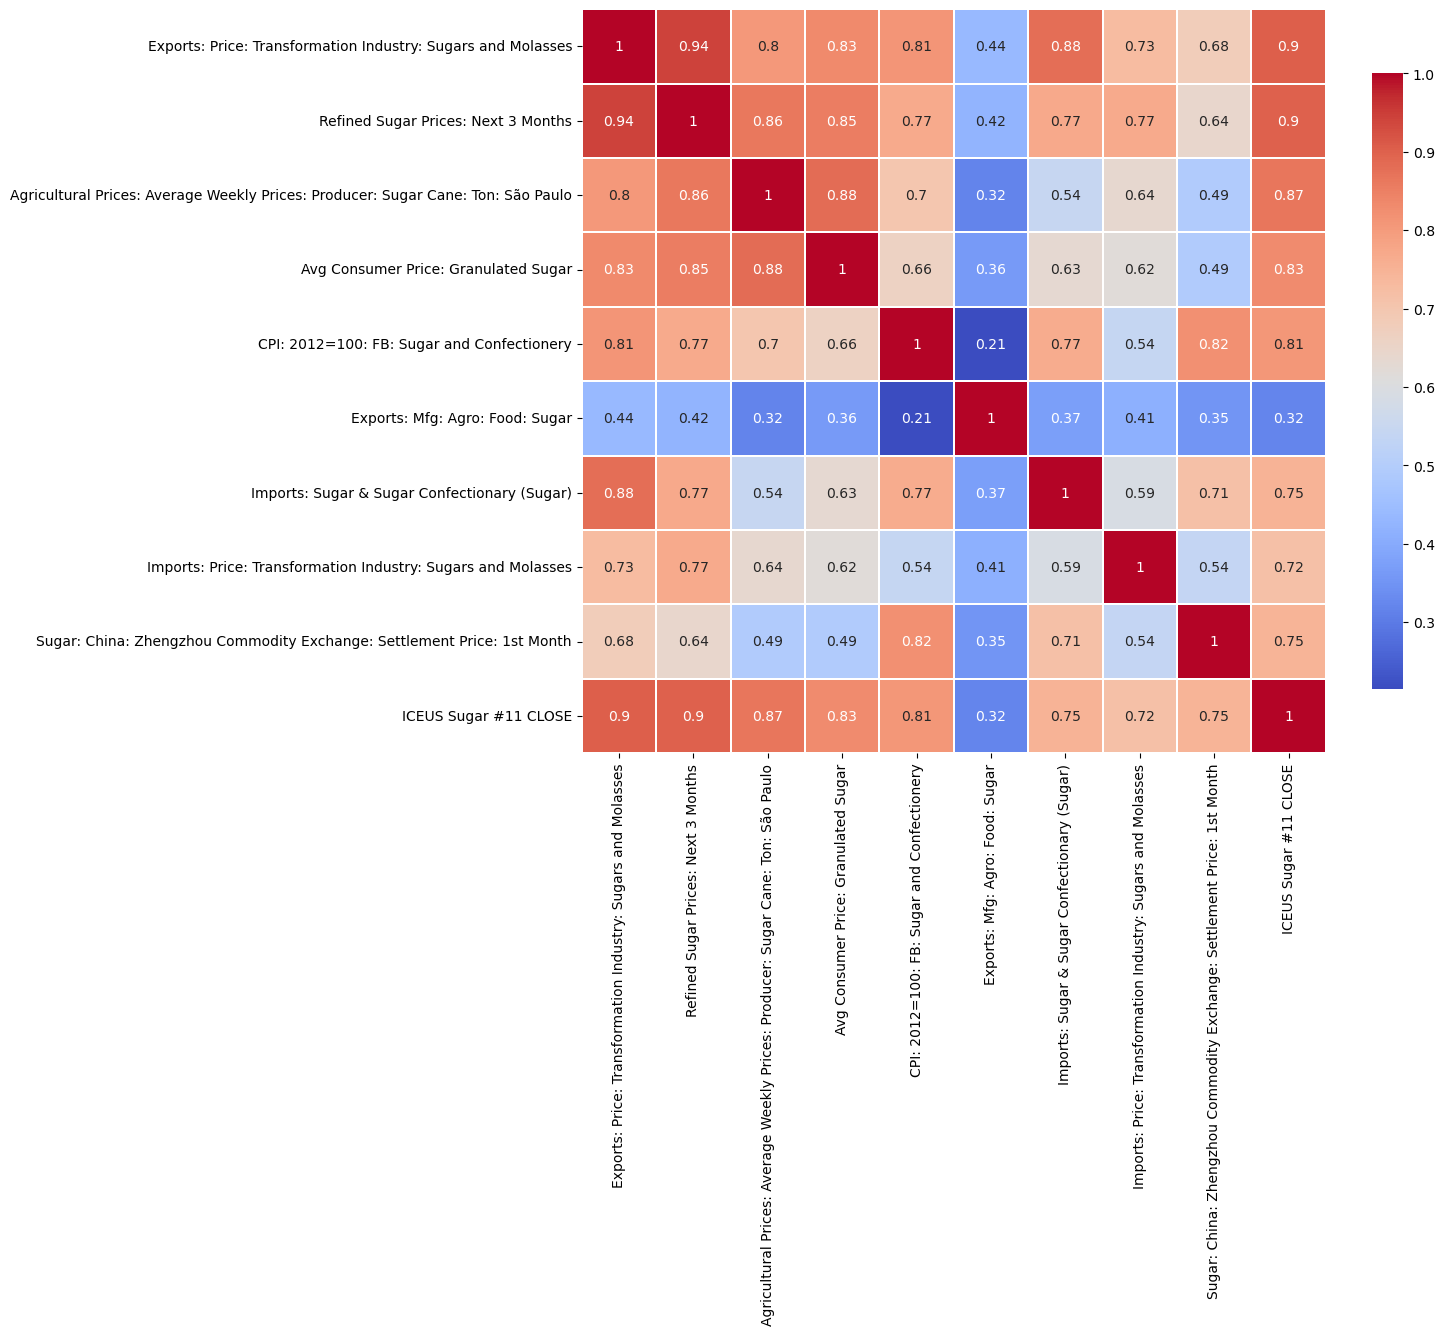

In [77]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [78]:
sq_corr3=correlation_matrix3.iloc[-1]**2
average_corr3=sq_corr3.mean()
average_corr3

0.6455902992920958

If we backward fill and then also forward fill: 

In [59]:
ceic_backward_forward_filled=ceic_backward_filled.ffill()
ceic_backward_forward_filled.dropna()
correlation_matrix4=ceic_backward_forward_filled.corr()

<Axes: >

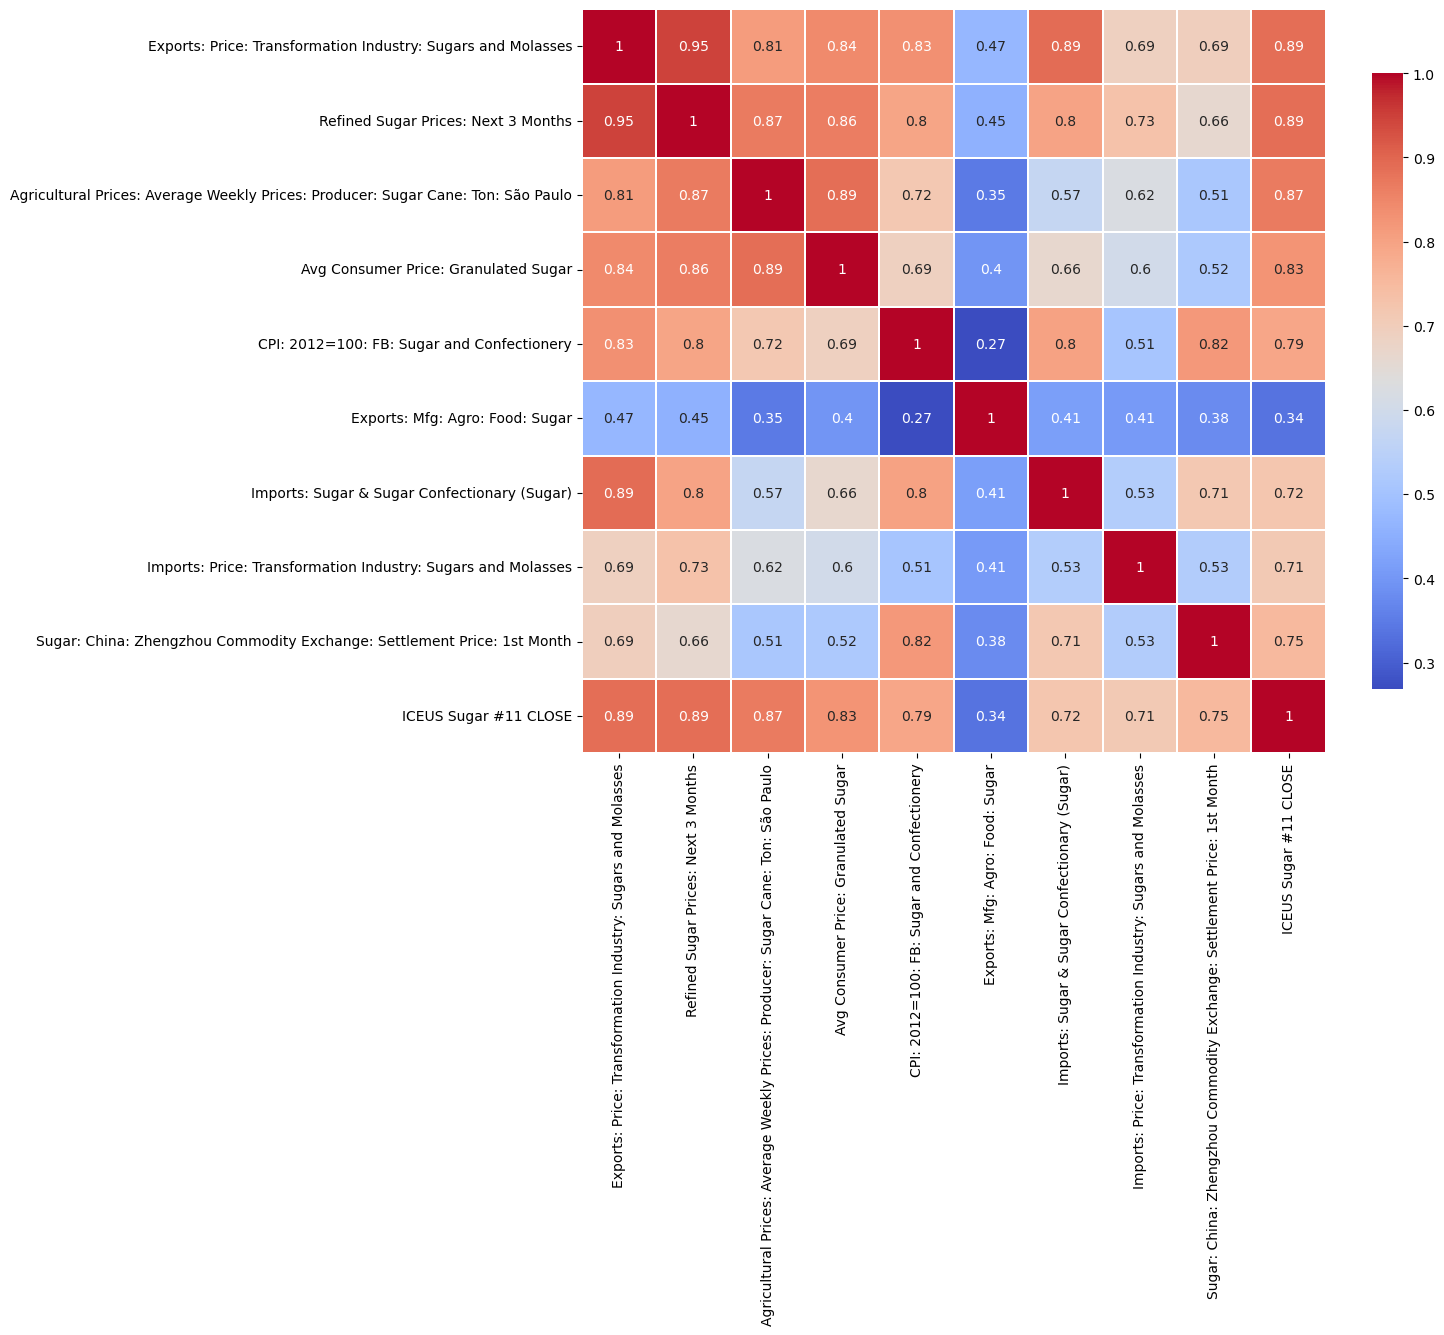

In [60]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [61]:
sq_corr4=correlation_matrix4.iloc[-1]**2
average_corr4=sq_corr4.mean()
average_corr4

0.633450238140445

If fill all NaN values with the averages of their columns

In [62]:
column_means=ceic.mean()
ceic_average_filled=ceic.fillna(column_means)
ceic_average_filled.dropna()
correlation_matrix5=ceic_average_filled.corr()

<Axes: >

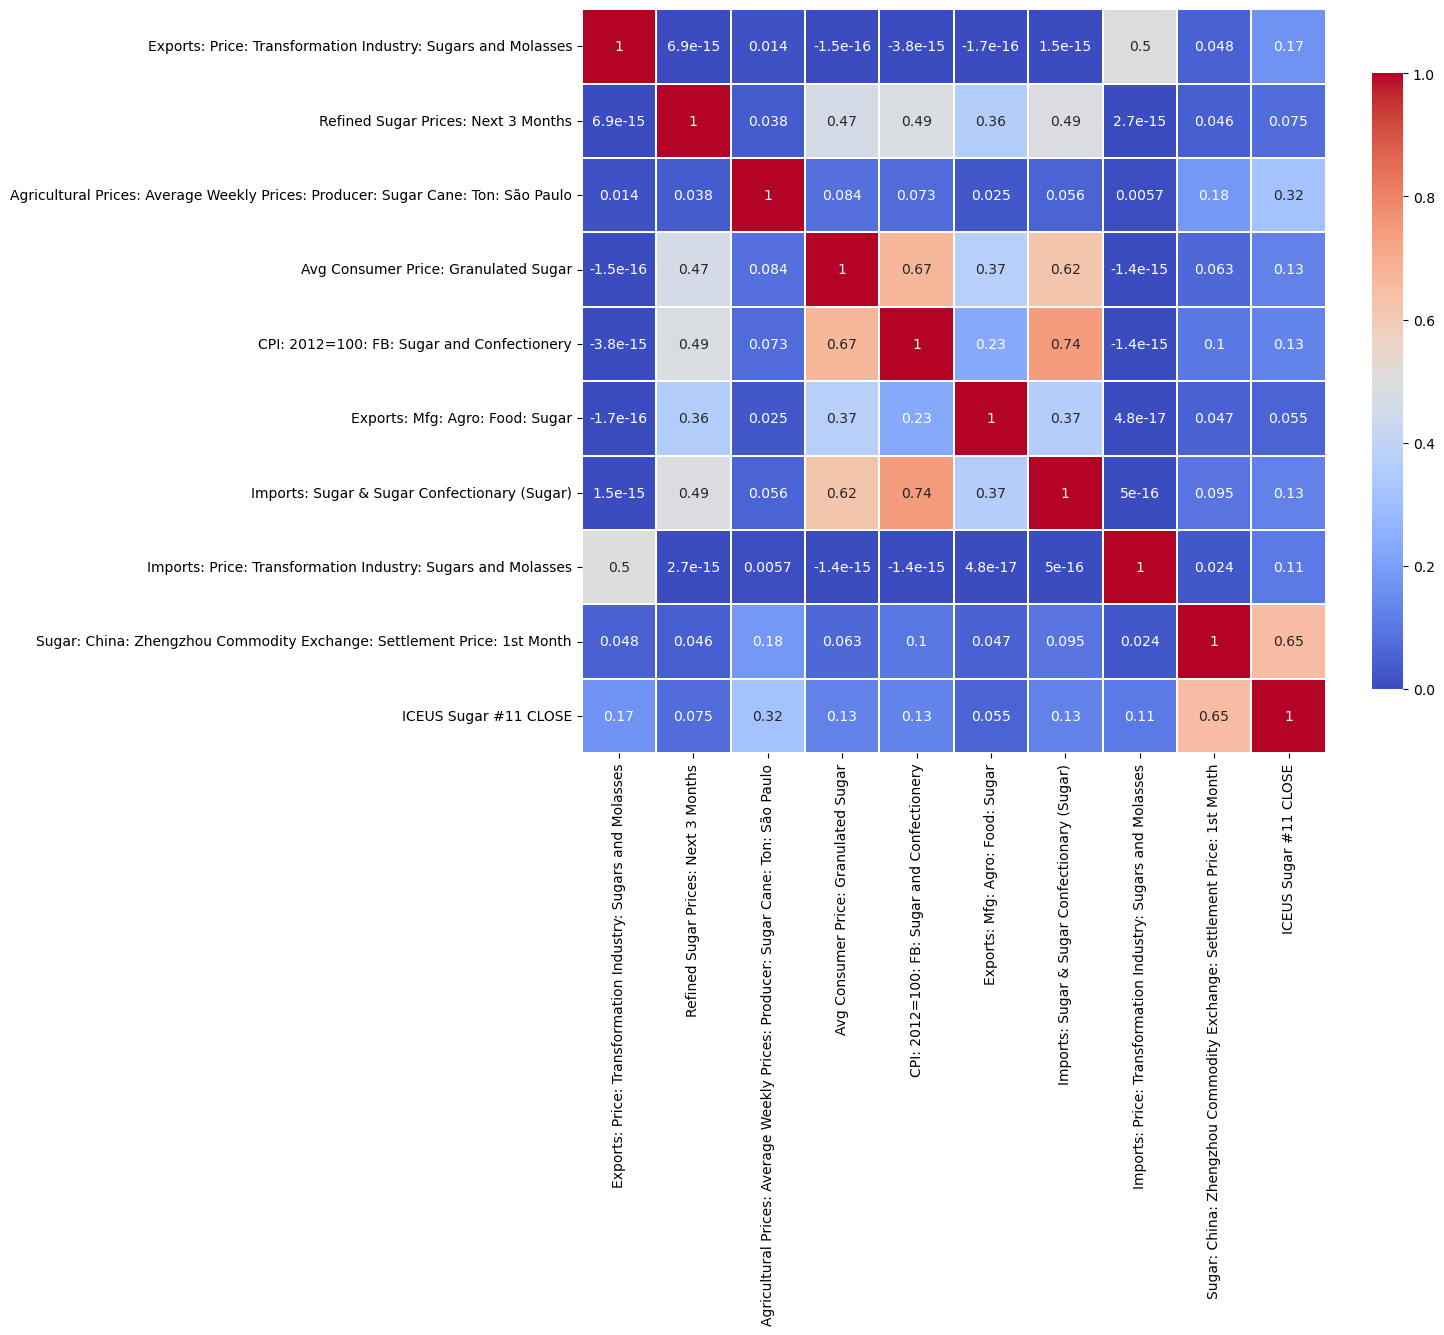

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix5, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [64]:
sq_corr5=correlation_matrix5.iloc[-1]**2
average_corr5=sq_corr5.mean()
average_corr5

0.16255077598621623

If we use linear interpolation:

In [65]:
ceic_interpolated=ceic.interpolate(method='linear')
ceic_interpolated.dropna()
correlation_matrix6=ceic_interpolated.corr()

<Axes: >

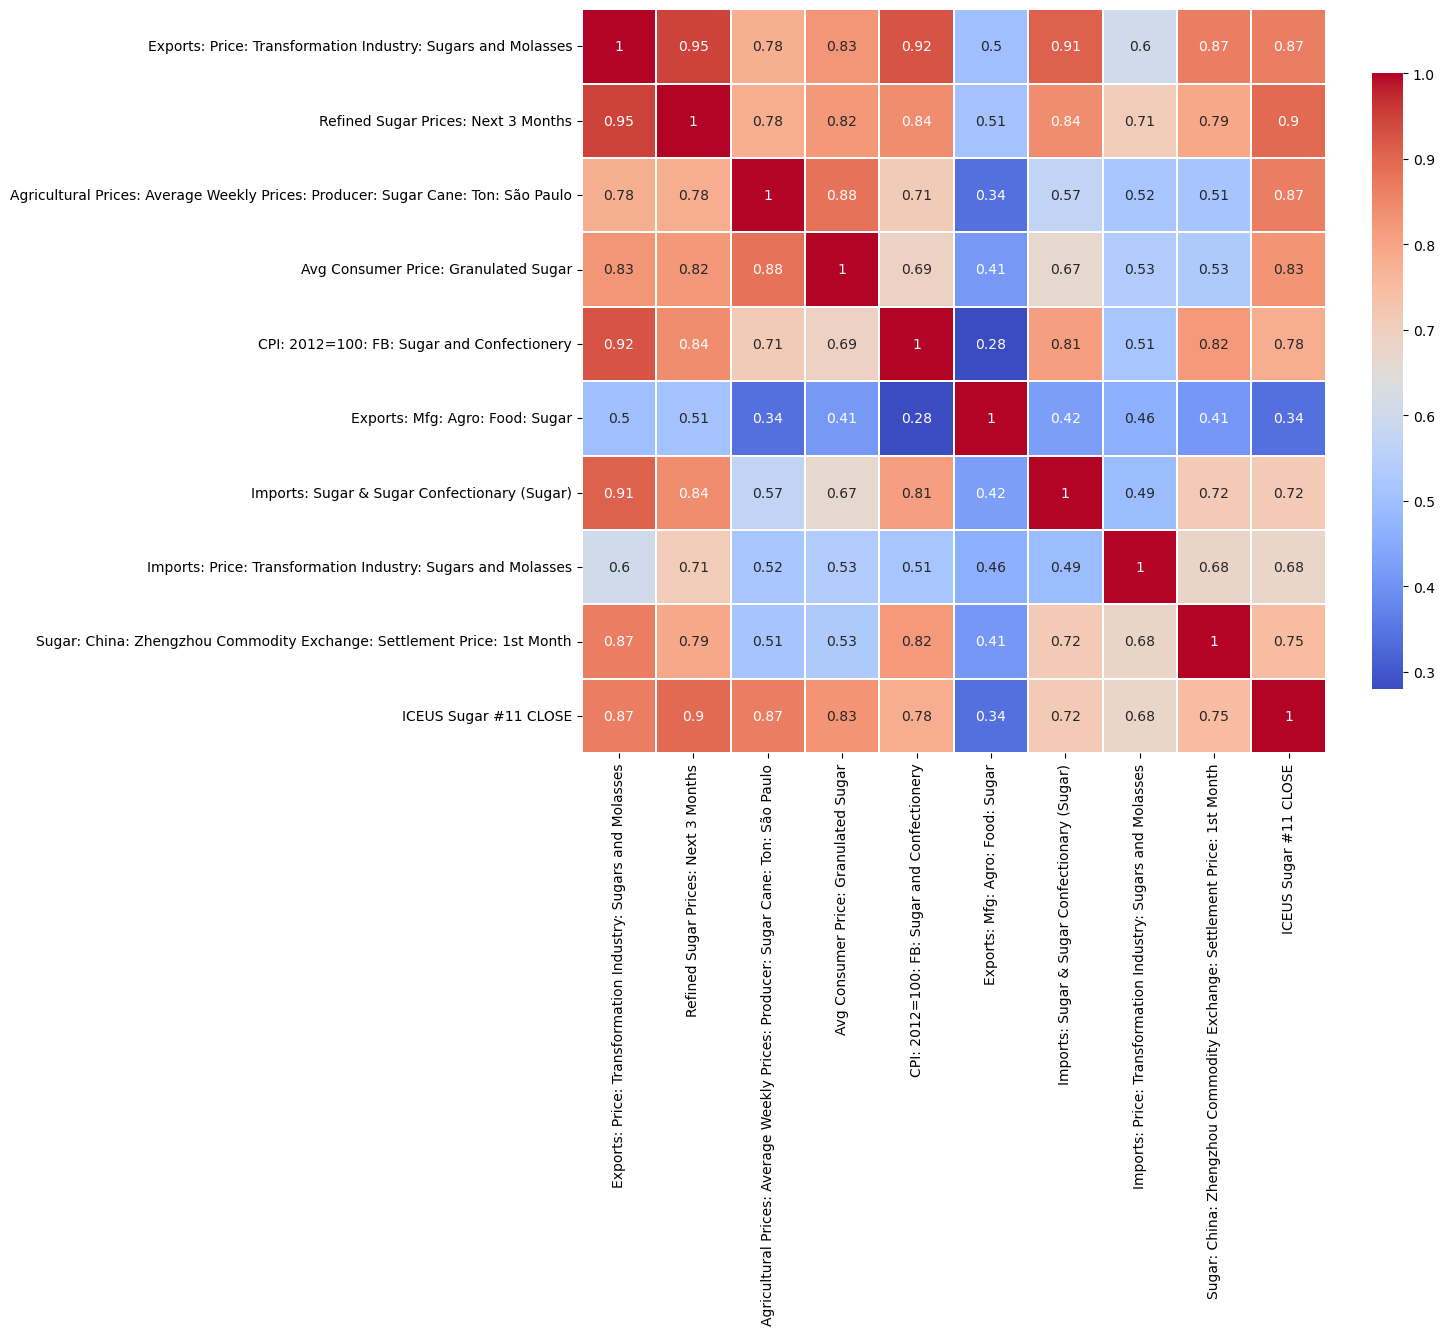

In [66]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix6, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [67]:
sq_corr6=correlation_matrix6.iloc[-1]**2
average_corr6=sq_corr6.mean()
average_corr6

0.6255012394711545

If we use time interpolation: 

In [68]:
ceic_interpolated2=ceic.interpolate(method='time')
ceic_interpolated2.dropna()
correlation_matrix7=ceic_interpolated2.corr()

<Axes: >

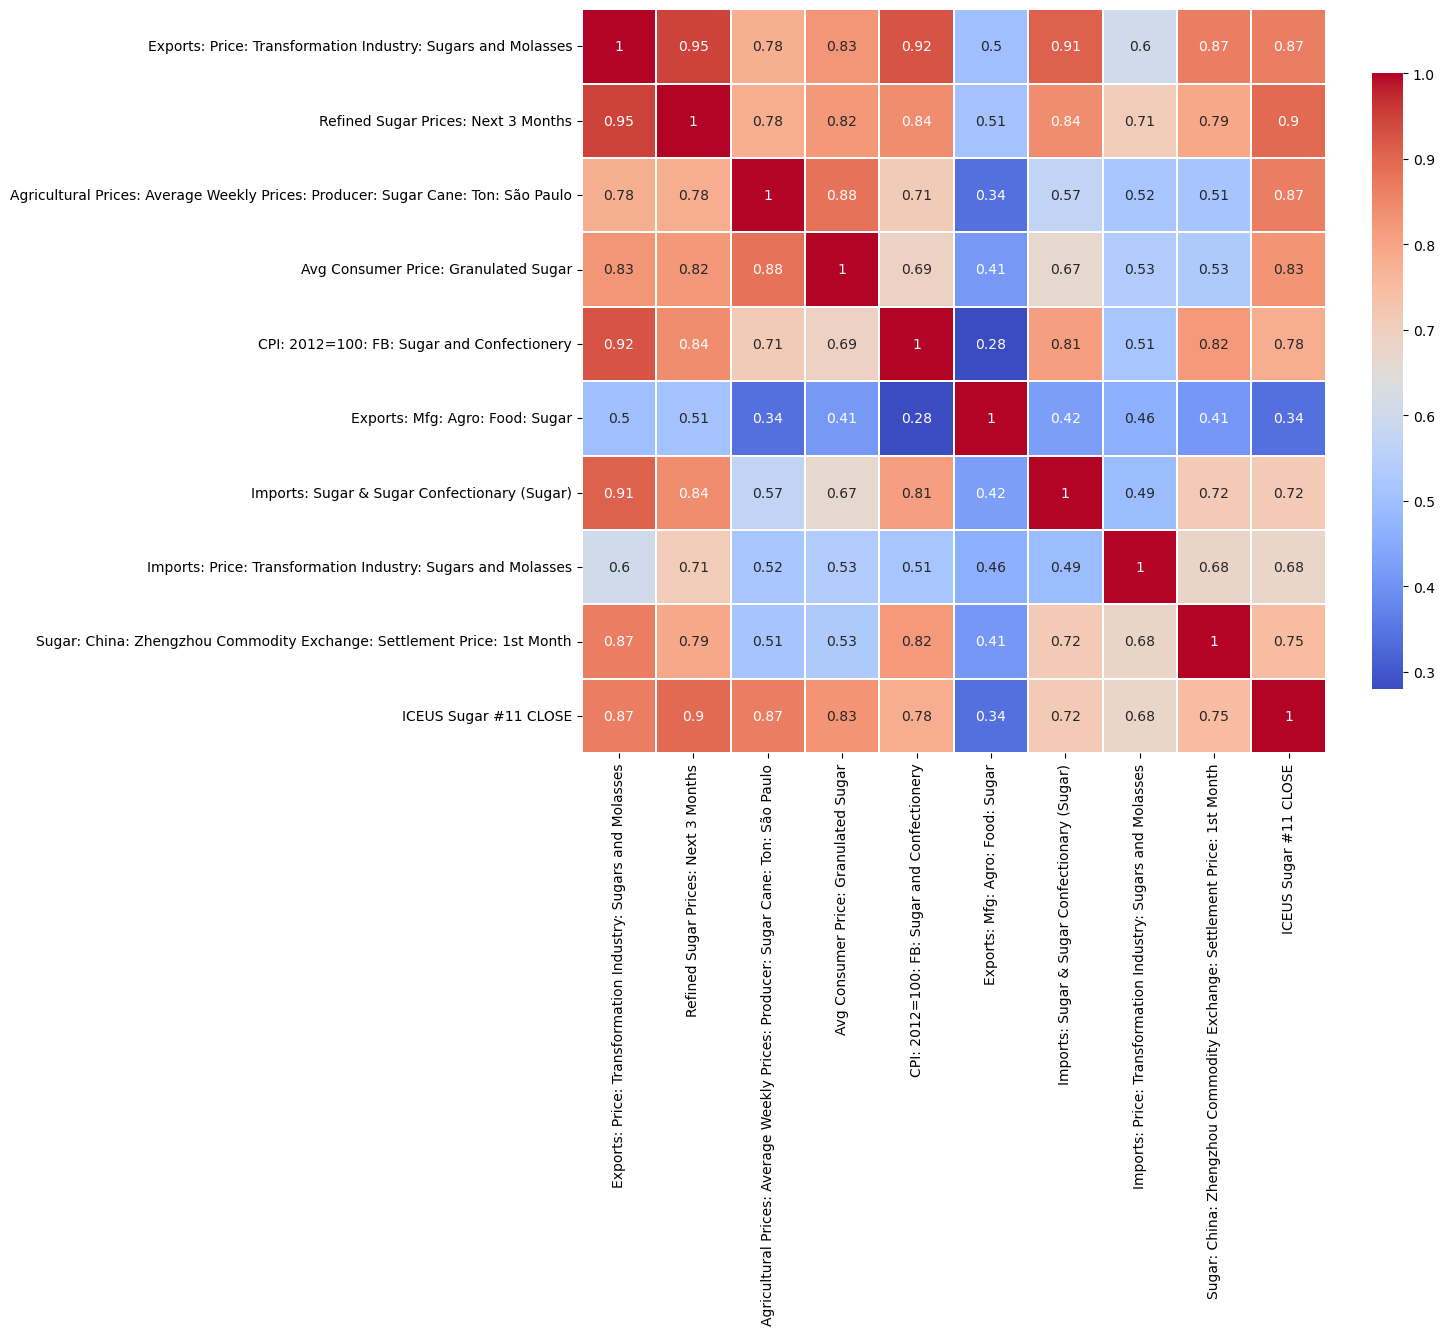

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix7, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [70]:
sq_corr7=correlation_matrix7.iloc[-1]**2
average_corr7=sq_corr7.mean()
average_corr7

0.6255012394711544

If we use nearest value interpolation:

In [71]:
ceic_interpolated3=ceic.interpolate(method='nearest')
ceic_interpolated3.dropna()
correlation_matrix8=ceic_interpolated3.corr()

<Axes: >

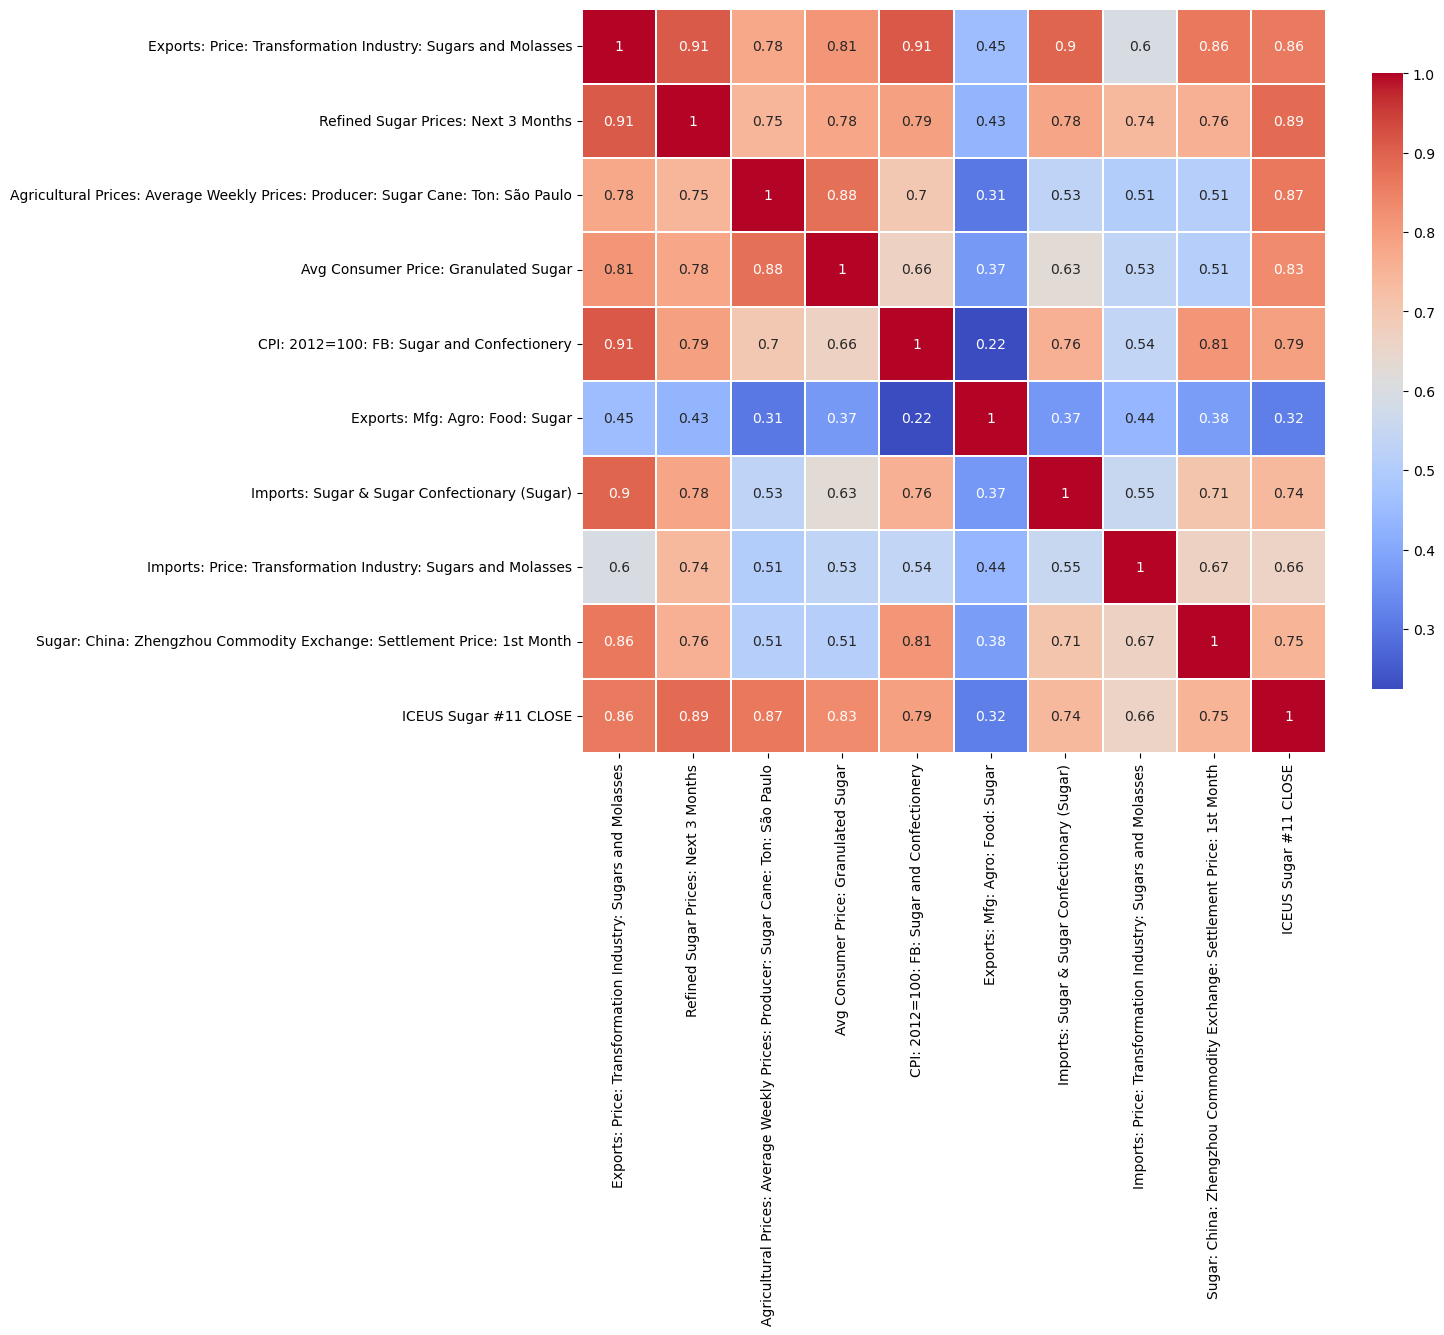

In [72]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix8, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [73]:
sq_corr8=correlation_matrix8.iloc[-1]**2
average_corr8=sq_corr8.mean()
average_corr8

0.623801597217482